<a href="https://colab.research.google.com/github/Akshayk10/MyProjects/blob/main/Sentimental_Analysis_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting file from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing necessary Python Libraries

In [ ]:
import numpy as np
import pandas as pd

Using Pandas library to understand data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.csv')

In [ ]:
data.shape


(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

Importing necessary NLP Libraries

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Preprocessing

In [ ]:
corpus = []
for i in range(0,1000):

    review = re.sub(pattern='[^a-zA-z]',repl =' ',string = data['Review'][i])

    review = review.lower()

    review_words = review.split()

    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

    ps = PorterStemmer()
    review_words = [ps.stem(word) for word in review_words]

    review = ''.join(review)

    corpus.append(review)


In [ ]:
corpus[:1500]

['wow    loved this place ',
 'crust is not good ',
 'not tasty and the texture was just nasty ',
 'stopped by during the late may bank holiday off rick steve recommendation and loved it ',
 'the selection on the menu was great and so were the prices ',
 'now i am getting angry and i want my damn pho ',
 'honeslty it didn t taste that fresh  ',
 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer ',
 'the fries were great too ',
 'a great touch ',
 'service was very prompt ',
 'would not go back ',
 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced ',
 'i tried the cape cod ravoli  chicken  with cranberry   mmmm ',
 'i was disgusted because i was pretty sure that was human hair ',
 'i was shocked because no signs indicate cash only ',
 'highly recommended ',
 'waitress was a little slow in service ',
 'this place is not worth your time  let alone vegas ',
 'did not like at all 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)


In [ ]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((800, 1500), (200, 1500), (200,), (800,))

Training the Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
import xgboost as xgb

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Fit the classifier to your training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters as needed

# Fit the classifier to your training data
logistic_classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

Generating the predictions

In [ ]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1])

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

y_pred_rf

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0])

In [ ]:
y_pred_xgb = xgb_classifier.predict(X_test)

y_pred_xgb

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0])

In [ ]:
y_pred_logistic = logistic_classifier.predict(X_test)

y_pred_logistic

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

Model Performances

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

score4 = accuracy_score(y_test,y_pred_rf)
score5 = precision_score(y_test,y_pred_rf)
score6 = recall_score(y_test,y_pred_rf)

score7 = accuracy_score(y_test,y_pred_xgb)
score8 = precision_score(y_test,y_pred_xgb)
score9 = recall_score(y_test,y_pred_xgb)

score1_1 = accuracy_score(y_test,y_pred_logistic)
score2_1 = precision_score(y_test,y_pred_logistic)
score3_1 = recall_score(y_test,y_pred_logistic)

print("-----Scores-----")
print("-----Naive Bayes-----")
print("Accuracy score is {}%".format(round(score1*100,2)))
print("Precision score is {}%".format(round(score2*100,2)))
print("Recall score is {}%".format(round(score3*100,2)))

print("-----Scores-----")
print("-----Random Forest-----")
print("Accuracy score is {}%".format(round(score4*100,2)))
print("Precision score is {}%".format(round(score5*100,2)))
print("Recall score is {}%".format(round(score6*100,2)))

print("-----Scores-----")
print("-----XGBoost-----")
print("Accuracy score is {}%".format(round(score7*100,2)))
print("Precision score is {}%".format(round(score8*100,2)))
print("Recall score is {}%".format(round(score9*100,2)))

print("-----Scores-----")
print("-----Logistic-----")
print("Accuracy score is {}%".format(round(score1_1*100,2)))
print("Precision score is {}%".format(round(score2_1*100,2)))
print("Recall score is {}%".format(round(score3_1*100,2)))

-----Scores-----
-----Naive Bayes-----
Accuracy score is 79.5%
Precision score is 79.81%
Recall score is 80.58%
-----Scores-----
-----Random Forest-----
Accuracy score is 76.0%
Precision score is 81.61%
Recall score is 68.93%
-----Scores-----
-----XGBoost-----
Accuracy score is 80.5%
Precision score is 86.36%
Recall score is 73.79%
-----Scores-----
-----Logistic-----
Accuracy score is 82.0%
Precision score is 83.84%
Recall score is 80.58%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[76, 21],
       [20, 83]])

Plotting the Confusion Matrix

Text(95.72222222222221, 0.5, 'Actual Values')

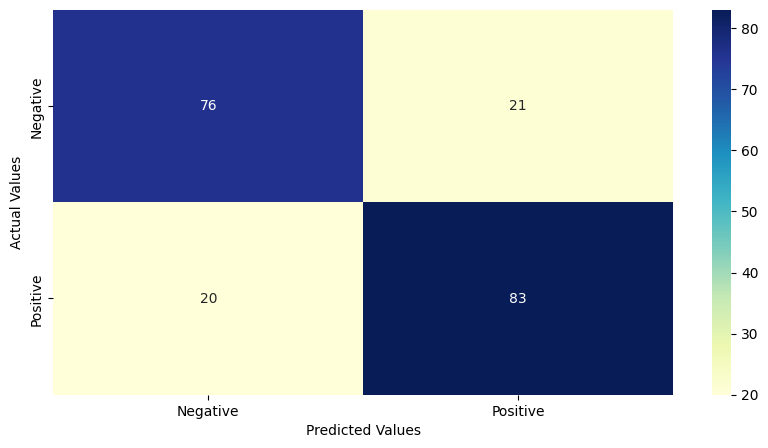

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,5))
sns.heatmap(cm,annot = True, cmap = 'YlGnBu',xticklabels = ['Negative','Positive'], yticklabels = ['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')


Optimizing the alpha values

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print("Accuracy score for alpha={} is {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is 78.5%
Accuracy score for alpha=0.2 is 78.5%
Accuracy score for alpha=0.3 is 80.0%
Accuracy score for alpha=0.4 is 80.5%
Accuracy score for alpha=0.5 is 80.5%
Accuracy score for alpha=0.6 is 80.5%
Accuracy score for alpha=0.7 is 80.5%
Accuracy score for alpha=0.8 is 80.0%
Accuracy score for alpha=0.9 is 81.0%
Accuracy score for alpha=1.0 is 79.5%
--------------------------------
The best accuracy is 81.0% with alpha value as 0.9


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

Predicting the model effeciency using sample reviews

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = 'The food is really bad.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [ ]:
sample_review = 'Food was pretty bad and the service very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a NEGATIVE review


In [ ]:
sample_review = 'Food was really tasty and it was worth it.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')

This is a POSITIVE review
